In [40]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import sympy

### Idéer 

**1. Vattenbrist**

Man kan försöka undersöka vattenbalansen i Sverige (under ett rimligt tidsintervall) genom att hitta funktioner (m.h.a. minsta kvadratmetoden) för vattenuttag och vattentillgång, och sedan göra en for-loop som använder sig av ekvationen nedan (WEI+ är ett index på vattenbrist: värden över 20% = vattenbrist).
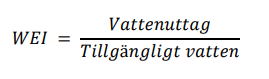

ekvationen: https://www.smhi.se/polopoly_fs/1.152541!/Hydrologi_120.pdf

### Test

In [35]:
#data = np.loadtxt("C:/Users/Mills/Downloads/Linear_algebra/vattenuttag.txt")

with open('C:/Users/Mills/Downloads/Linear_algebra/vattenuttag.txt', 'r') as csvfile:
    reader = csv.reader(csvfile)

x_data = data[:, 2] # [:, 0] för årtal, [:, 2] för år efter 1970
y_data = data[:, 1]

In [36]:
fit_coeffs = np.polyfit( x_data , y_data , 4) # fjärde-gradens-polynom-anpassning f(x) = a + b*x + c*x**2 + d*x**3 + e*x**4
a = fit_coeffs [4]
b = fit_coeffs [3]
c = fit_coeffs [2]
d = fit_coeffs [1]
e = fit_coeffs [0]

print(f'a = {a}, b = {b}, c = {c}, d = {d}, e = {e}')

a = 4085605734.265749, b = 89356175.60217272, c = -16923191.188810978, d = 604157.3954933897, e = -6455.5766899766395


Mathematica ger samma resultat (OBS! detta är med årtal som x_data): 

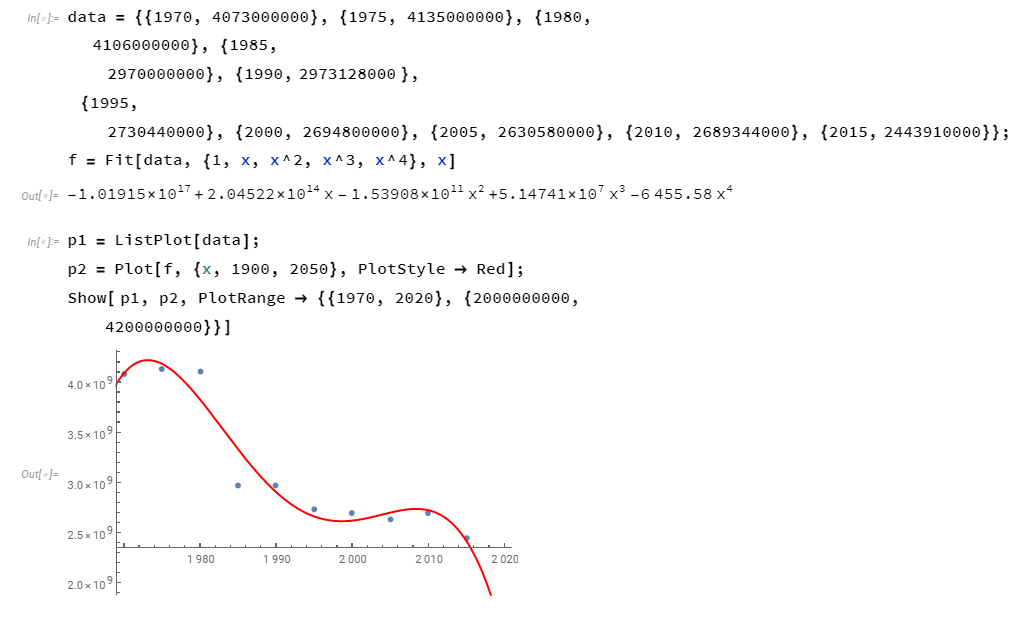

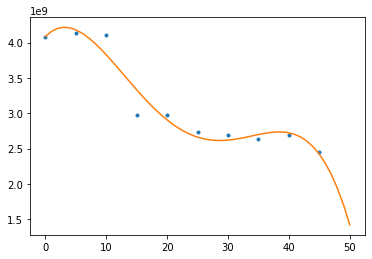

In [47]:
x = np.linspace(0,50)
y = 4085605734.265749 + 89356175.60217272 * x - 16923191.188810978 * x**2 + 604157.3954933897 * x**3 - 6455.5766899766395 * x**4

plt.plot(x_data, y_data, '.')
plt.plot(x, y)
plt.show()